# Pipeline

- Scikit Learn에서 제공하는 Pipeline을 활용해 여러 알고리즘의 반복으로 인한 실행 순서 혼돈을 줄일 수 있다.

In [1]:
import pandas as pd

red_wine = pd.read_csv("../dataset/winequality-red.csv", sep=';')
white_wine = pd.read_csv("../dataset/winequality-white.csv", sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1) #--> column drop
y = wine['color']

## 🔰 Pipeline 만들기

<img src="https://github.com/ElaYJ/Study_Machine_Learning/assets/153154981/80a31263-5d1a-47df-8230-a8fe52b3698c" width="77%" height="77%">

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

#--> List형으로 Pipeline으로 작동할 순서와 도구를 넣어준다.
estimators = [
	('scaler', StandardScaler()),
 	('clf', DecisionTreeClassifier())
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

#### --▶ `Pipeline.steps`

In [3]:
pipe.steps

[('scaler', StandardScaler()), ('clf', DecisionTreeClassifier())]

In [4]:
pipe.steps[0]

('scaler', StandardScaler())

In [5]:
pipe.steps[1]

('clf', DecisionTreeClassifier())

#### --▶ step별로 객체 호출

In [6]:
pipe[0]

StandardScaler()

In [7]:
pipe['scaler']

StandardScaler()

#### --▶ `set_params`

- Scaler에는 특별한 parameter가 없지만,

- DecisionTreeClassifier에는 max_depth와 같은 매개변수가 존재하므로 인수 지정이 필요하다.

- <방식> 스탭이름 “clf” + ⭐ **언더바 두 개 “- -”** ⭐ + 속성 이름

	언더바 두 개를 쓰면 속성을 바로 지정하게 되는 것이다.

In [4]:
pipe.set_params(clf__max_depth=2)
pipe.set_params(clf__random_state=13)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

## 🔰 Pipeline을 활용한 분류기

- Pipeline을 이용해 분류기를 구성하여 모델을 생성한다.

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3918, 1279], dtype=int64))

In [7]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3437,6.7,0.40,0.22,8.8,0.052,24.0,113.0,0.99576,3.22,0.45,9.4,5
2124,7.7,0.39,0.28,4.9,0.035,36.0,109.0,0.99180,3.19,0.58,12.2,7
3005,6.9,0.30,0.36,0.9,0.037,40.0,156.0,0.98968,3.08,0.36,12.1,6
2436,6.9,0.43,0.28,9.4,0.056,29.0,183.0,0.99594,3.17,0.43,9.4,5
444,6.9,0.24,0.36,20.8,0.031,40.0,139.0,0.99750,3.20,0.33,11.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4710,5.4,0.33,0.31,4.0,0.030,27.0,108.0,0.99031,3.30,0.43,12.2,7
44,6.7,0.23,0.26,1.4,0.060,33.0,154.0,0.99340,3.24,0.56,9.5,6
1987,8.1,0.22,0.28,7.7,0.043,57.0,176.0,0.99540,3.12,0.55,10.0,5
2422,6.2,0.44,0.18,7.7,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5


In [8]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', DecisionTreeClassifier(max_depth=2, random_state=13))])

#### --▶ 성과 확인

In [9]:
from sklearn.metrics import accuracy_score

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc:', accuracy_score(y_train, y_pred_tr))
print('Test Acc:', accuracy_score(y_test, y_pred_test))

Train Acc: 0.9657494708485664
Test Acc: 0.9576923076923077


#### --▶ 모델 구조 확인

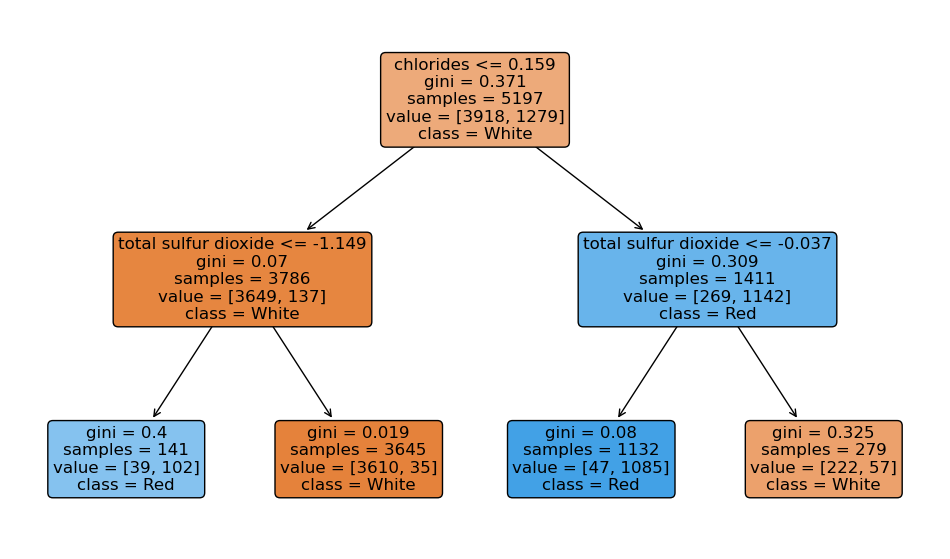

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,7))
plot_tree(pipe['clf'], feature_names=X.columns.tolist(), class_names=['White','Red'], fontsize=12, filled=True, rounded=True);